In [1]:
#!/bin/bash
!curl -L -o london-bike-sharing-dataset.zip https://www.kaggle.com/api/v1/datasets/download/hmavrodiev/london-bike-sharing-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  165k  100  165k    0     0   243k      0 --:--:-- --:--:-- --:--:--  243k


In [2]:
!unzip london-bike-sharing-dataset.zip

Archive:  london-bike-sharing-dataset.zip
  inflating: london_merged.csv       


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/london_merged.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [8]:
df['year']=df['timestamp'].dt.year
df['month']=df['timestamp'].dt.month
df['day']=df['timestamp'].dt.day
df['hour']=df['timestamp'].dt.hour

In [9]:
df.drop(['timestamp'],axis=1,inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [10]:
df_by_years=df.groupby(by='year')['cnt'].mean()

<Axes: xlabel='year'>

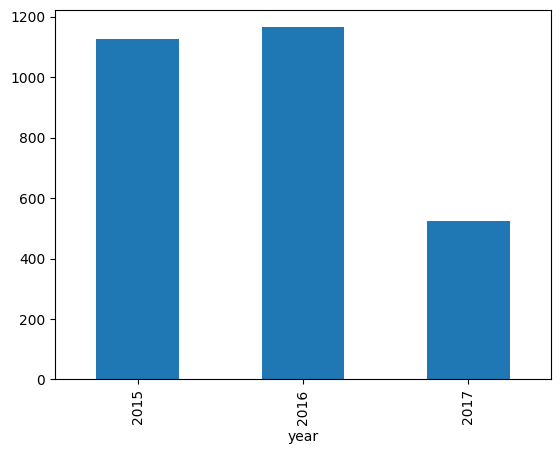

In [11]:
df_by_years.plot(kind='bar')

In [12]:
import matplotlib.pyplot as plt

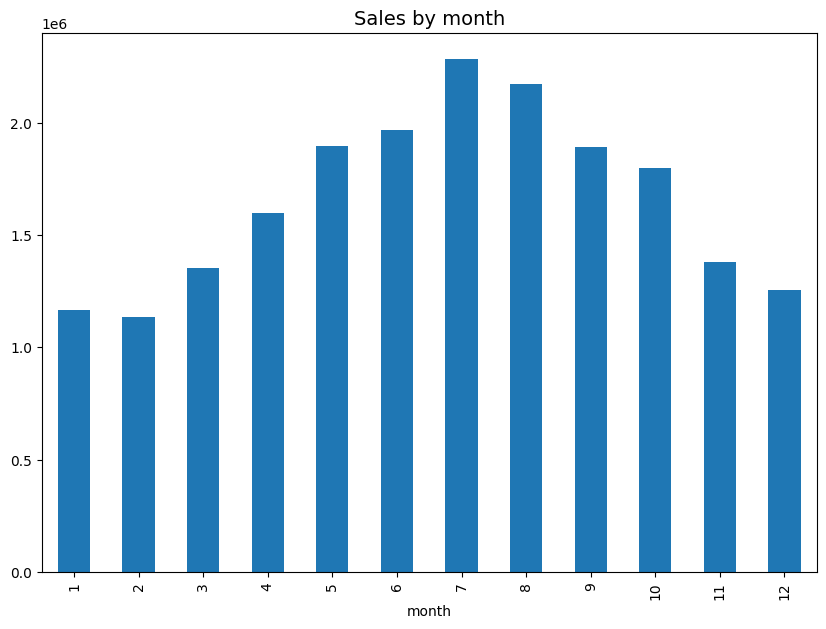

In [13]:
df_by_months=df.groupby(by='month')['cnt'].sum()
plt.figure(figsize=(10,7))
df_by_months.plot(kind='bar')
plt.title('Sales by month', size=14);

In [14]:
weekend_df=df[df['is_weekend']==1]
weekday_df=df[df['is_weekend']==0]

In [15]:
weekday_df_hourly=weekday_df.groupby(by='hour')['cnt'].sum()
weekend_df_hourly=weekend_df.groupby(by='hour')['cnt'].sum()

Text(0.5, 1.0, 'Hourly sales on weekdays')

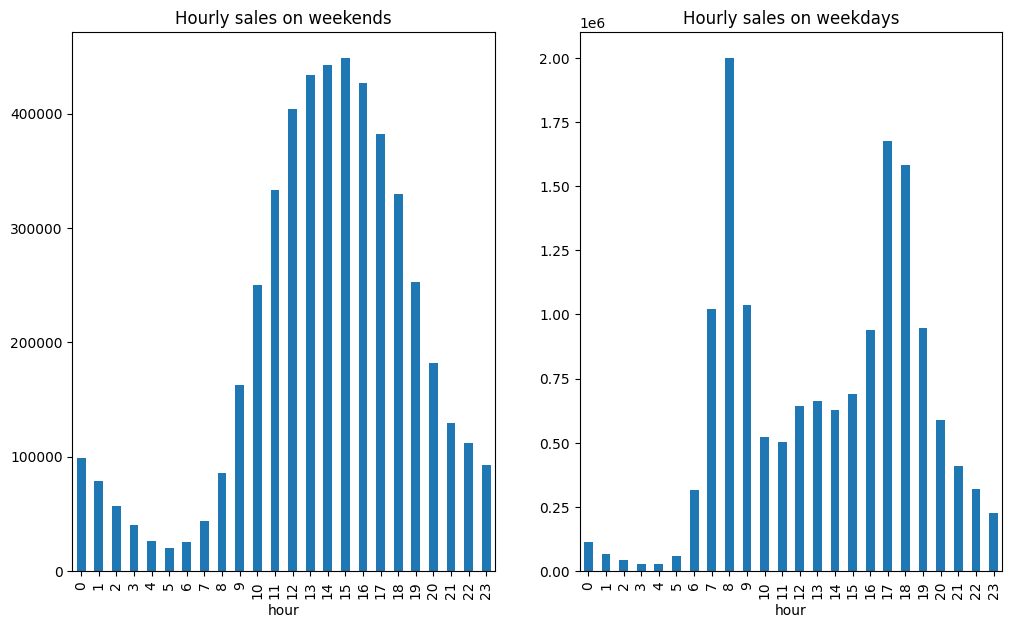

In [16]:
plt.figure(figsize=(12,7))
plt.subplot(121)
weekend_df_hourly.plot(kind='bar')
plt.title('Hourly sales on weekends')
plt.subplot(122)
weekday_df_hourly.plot(kind='bar')
plt.title('Hourly sales on weekdays')

In [17]:
df['hum'][2]

np.float64(96.5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year          17414 non-null  int32  
 10  month         17414 non-null  int32  
 11  day           17414 non-null  int32  
 12  hour          17414 non-null  int32  
dtypes: float64(8), int32(4), int64(1)
memory usage: 1.5 MB


In [19]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [22]:
df['hum_cat']=pd.cut(df['hum'],bins=5, labels=['low','mid-low','mid','mid-high','high'])

<Axes: xlabel='hum'>

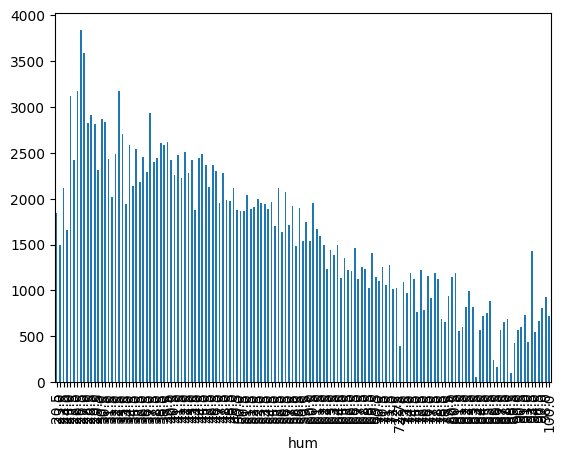

In [23]:
df.groupby('hum')['cnt'].mean().plot(kind='bar')